In [2]:
import tensorflow as tf
tf.__version__

'1.3.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


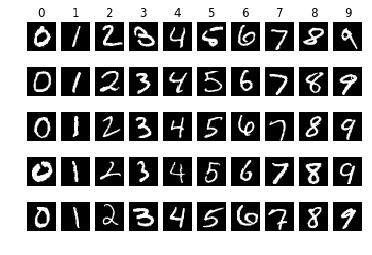

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in range(10):
    digits = np.argmax(mnist.test.labels, 1)
    indexes = (digits == i)
    images = mnist.test.images[indexes][0:5]

    for j in range(5):   
        plt.subplot(5, 10, i + j*10 + 1)
        plt.imshow(images[j].reshape(28, 28), cmap='gray')
        if j == 0:
            plt.title(i)
        plt.axis('off')
plt.show()

In [66]:
def weight_variable(name, shape):
  return tf.get_variable(name, shape, initializer=tf.contrib.layers.xavier_initializer())

def bias_variable(name, shape):
  return tf.get_variable(name, shape, initializer=tf.constant_initializer(0.0))

Initialising...
1100 batches per epoch
0  0  0.97215  0.72463


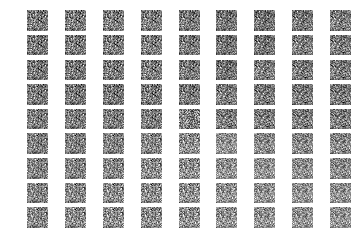

0  1  0.96643  0.73281


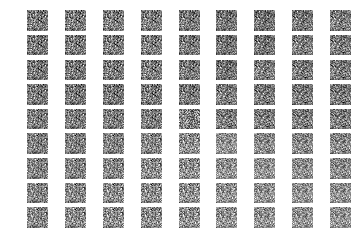

0  2  0.97089  0.74126


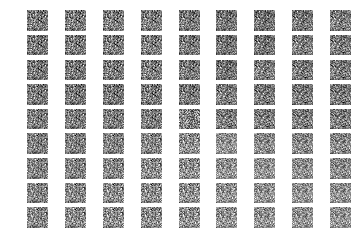

0  4  0.96053  0.75919


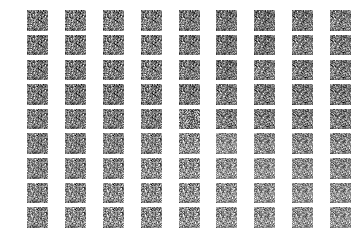

0  7  0.95508  0.78644


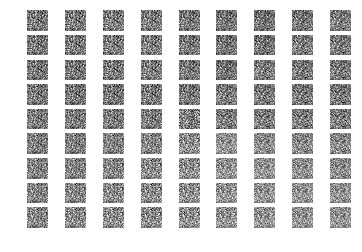

0  12  0.92368  0.83373


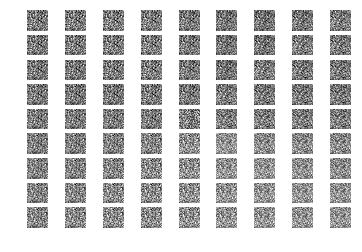

0  20  0.87610  0.91120


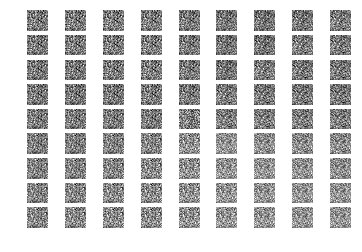

0  33  0.84092  1.02947


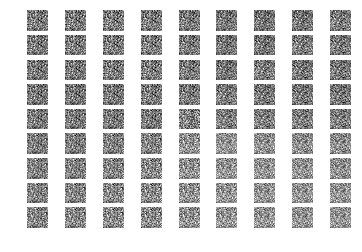

0  54  0.77477  1.16743


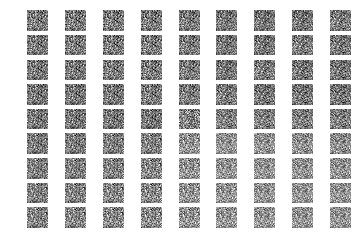

0  88  0.70004  1.30034


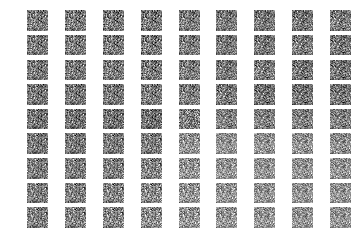

0  143  0.65052  1.39987


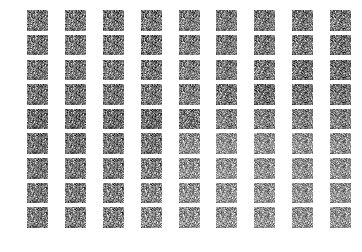

0  232  0.58169  1.45848


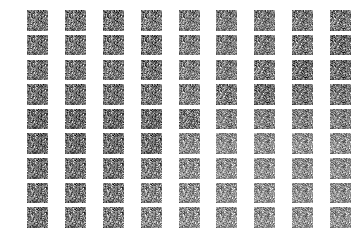

0  376  0.51074  1.49751


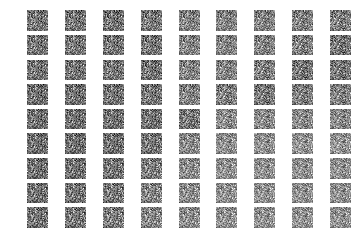

0  609  0.40595  1.52430


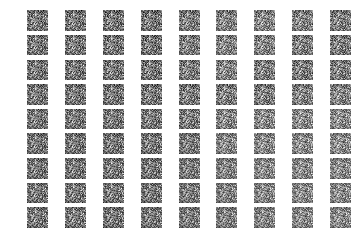

0  986  0.36004  1.52178


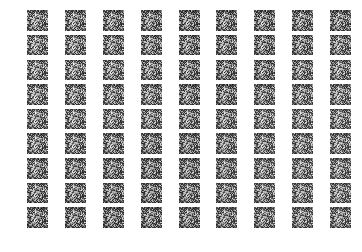

1  496  0.43765  1.39867


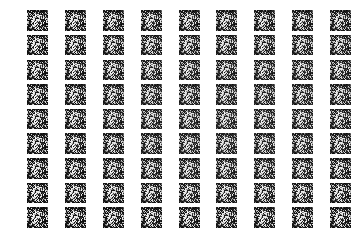

2  383  0.32279  1.56058


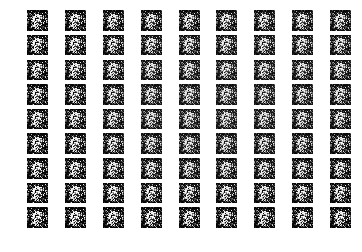

3  880  0.34568  1.55304


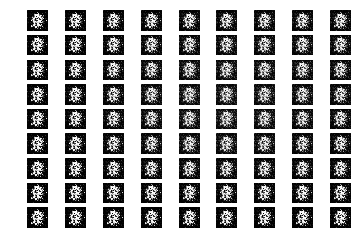

6  164  0.39962  1.49161


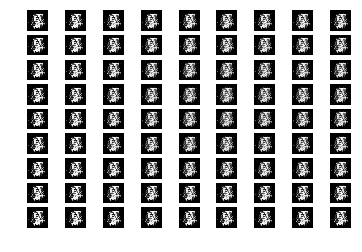

9  1045  0.42667  1.39057


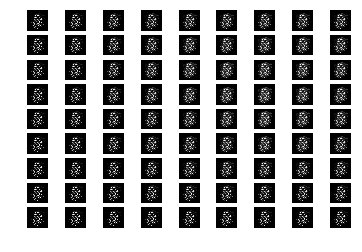

KeyboardInterrupt: 

In [90]:
print('Initialising...')

image_size = 784
z_dims = 2
hidden_size = 200

tf.reset_default_graph()

z = tf.placeholder("float", [None, z_dims])
D_input = tf.placeholder("float", [None, image_size])
D_y_ = tf.placeholder("float", [None, 1])

# generator
# hidden layer 1
G_w1 = weight_variable("G_w1", [z_dims, hidden_size])
G_b1 = bias_variable("G_b1", [hidden_size])
G_y1 = tf.nn.relu(tf.add(tf.matmul(z, G_w1), G_b1))
# hidden layer 2
G_w2 = weight_variable("G_w2", [hidden_size, hidden_size])
G_b2 = bias_variable("G_b2", [hidden_size])
G_y2 = tf.nn.relu(tf.add(tf.matmul(G_y1, G_w2), G_b2))
# output (fake generated "MNIST digit")
G_w3 = weight_variable("G_w3", [hidden_size, image_size])
G_b3 = bias_variable("G_b3", [image_size])
G_y = tf.sigmoid(tf.add(tf.matmul(G_y2, G_w3), G_b3))
# trainable variables
G_trainables = [G_w1, G_b1, G_w2, G_b2, G_w3, G_b3]

# discriminator (connected to generator)
# hidden layer 1
D_w1 = weight_variable("D_w1", [image_size, hidden_size])
D_b1 = bias_variable("D_b1", [hidden_size])
D_y1 = tf.nn.relu(tf.add(tf.matmul(G_y, D_w1), D_b1))
# hidden layer 2
D_w2 = weight_variable("D_w2", [hidden_size, hidden_size])
D_b2 = bias_variable("D_b2", [hidden_size])
D_y2 = tf.nn.relu(tf.add(tf.matmul(D_y1, D_w2), D_b2))
# output (real / fake rating)
D_w3 = weight_variable("D_w3", [hidden_size, 1])
D_b3 = bias_variable("D_b3", [1])
D_y = tf.sigmoid(tf.add(tf.matmul(D_y2, D_w3), D_b3))
# trainable variables
D_trainables = [D_w1, D_b1, D_w2, D_b2, D_w3, D_b3]

# discriminator (image as input)
D2_y1 = tf.nn.relu(tf.add(tf.matmul(D_input, D_w1), D_b1))
D2_y2 = tf.nn.relu(tf.add(tf.matmul(D2_y1, D_w2), D_b2))
D2_y = tf.sigmoid(tf.add(tf.matmul(D2_y2, D_w3), D_b3))

ones = np.tile(np.array([1.0]), (batch_size, 1))
fuzzy_ones = np.tile(np.array([0.8]), (batch_size, 1))
fuzzy_zeros = np.tile(np.array([0.2]), (batch_size, 1))
D_train_y_ = np.append(fuzzy_ones, fuzzy_zeros, axis=0)

#G_loss = tf.losses.mean_squared_error(D_y, D_y_)
#D_loss = tf.losses.mean_squared_error(D2_y, D_y_)
#G_loss = tf.losses.absolute_difference(D_y, D_y_)
#D_loss = tf.losses.absolute_difference(D2_y, D_y_)
G_loss = tf.losses.log_loss(D_y, D_y_)
D_loss = tf.losses.log_loss(D2_y, D_y_)

G_train_step = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(G_loss, var_list = G_trainables)
#D_train_step = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(D_loss, var_list = D_trainables)
#G_train_step = tf.train.GradientDescentOptimizer(0.1).minimize(G_loss, var_list = G_trainables)
D_train_step = tf.train.GradientDescentOptimizer(0.001).minimize(D_loss, var_list = D_trainables)

init = tf.global_variables_initializer()

training_epochs = 100
batch_size = 50

batches_per_epoch = int(mnist.train.num_examples / batch_size)
print('{} batches per epoch'.format(batches_per_epoch))

total_batch_count = 0
last_fibonacci = 1
fibonacci = 1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        for batch in range(batches_per_epoch):
            z_ = np.random.uniform(-1., 1., size=[batch_size, z_dims])
            _, G_loss_, G_y_ = sess.run([G_train_step, G_loss, G_y], feed_dict={z: z_, D_y_: fuzzy_ones})
            
            batch_images = mnist.train.next_batch(50)
            D_train_images = np.append(batch_images[0], G_y_, axis=0)
            _, D_loss_ = sess.run([D_train_step, D_loss], feed_dict={D_input: D_train_images, D_y_: D_train_y_})
            
            total_batch_count = total_batch_count + 1
            is_fibonacci = (total_batch_count == fibonacci)
            finished = (epoch == training_epochs - 1) and (batch == batches_per_epoch - 1)
            if is_fibonacci or finished:
                print('{}  {}  {:0.5f}  {:0.5f}'.format(epoch, batch, D_loss_, G_loss_))
                grid_size = 8
                for i in range(grid_size + 1):
                    for j in range(grid_size + 1):
                        G_y_ = sess.run([G_y], feed_dict={z: np.array([[-1.0 + i * 2.0 / grid_size, -1.0 + j * 2.0 / grid_size]])})
                        plt.subplot(grid_size + 1, grid_size + 1, j * (grid_size + 1) + i + 1)
                        plt.imshow(G_y_[0].reshape(28, 28), cmap='gray')
                        plt.axis('off')
                plt.show()
                if is_fibonacci:
                    temp = fibonacci
                    fibonacci = last_fibonacci + fibonacci
                    last_fibonacci = temp
